# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_diastolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [1]:
# Read the data:
import pandas as pd
from helper_functions import format_variables, encode_data, best_subset_selection

file_path = "../styrian_health_data.xlsx"
sheet_name = "Sheet 1"
data_df = pd.read_excel(file_path, sheet_name=sheet_name)
data_df.describe()

/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,id,terminal,postleitzahl,befinden,geburtsjahr,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia
count,16386.000000,16386.000000,16052.000000,16363.000000,16363.000000,16341.000000,16330.000000,16386.000000,16386.000000
mean,23172.171549,1.921885,7939.793608,1.818493,1963.866100,122.406707,79.860808,124.095325,82.037227
std,6556.963202,0.822702,1663.222660,0.752412,18.528596,16.941340,9.955571,19.675775,14.638693
min,11519.000000,1.000000,1010.000000,1.000000,1880.000000,34.000000,30.000000,43.000000,27.000000
25%,17978.250000,1.000000,8051.000000,1.000000,1950.000000,115.000000,75.000000,110.000000,73.000000
50%,23345.500000,2.000000,8401.000000,2.000000,1962.000000,120.000000,80.000000,123.000000,81.000000
75%,28781.750000,3.000000,8641.000000,2.000000,1979.000000,130.000000,85.000000,137.000000,90.000000
max,34703.000000,3.000000,9991.000000,5.000000,2006.000000,299.000000,212.000000,217.000000,197.000000


### Large preprocessing

In [2]:
# calling the format function from the helper_functions:
features_to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "terminal"]
data_df, cat_features, num_featurses = format_variables(data_df, features_to_filter, drop_values=True)

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bundesland           14831 non-null  object 
 1   befinden             14831 non-null  object 
 2   geschlecht           14831 non-null  object 
 3   raucher              14831 non-null  object 
 4   blutzucker_bekannt   14831 non-null  object 
 5   cholesterin_bekannt  14831 non-null  object 
 6   in_behandlung        14831 non-null  object 
 7   schaetzwert_bp_sys   14831 non-null  float64
 8   schaetzwert_by_dia   14831 non-null  float64
 9   messwert_bp_sys      14831 non-null  float64
 10  messwert_bp_dia      14831 non-null  float64
 11  age                  14831 non-null  Int64  
dtypes: Int64(1), float64(4), object(7)
memory usage: 1.4+ MB


In [4]:
# Display the data:
data_df.head()

,bundesland,befinden,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age
0,Steiermark,2.0,f,False,False,False,False,120.0,80.0,123.0,86.0,42
1,Steiermark,1.0,f,False,False,False,False,150.0,80.0,162.0,86.0,53
2,Steiermark,2.0,m,False,False,False,False,135.0,70.0,121.0,66.0,46
3,Steiermark,5.0,f,False,True,True,False,120.0,80.0,122.0,70.0,34
4,Steiermark,1.0,f,False,False,True,False,110.0,80.0,110.0,75.0,40


/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_10110/2132544072.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr()


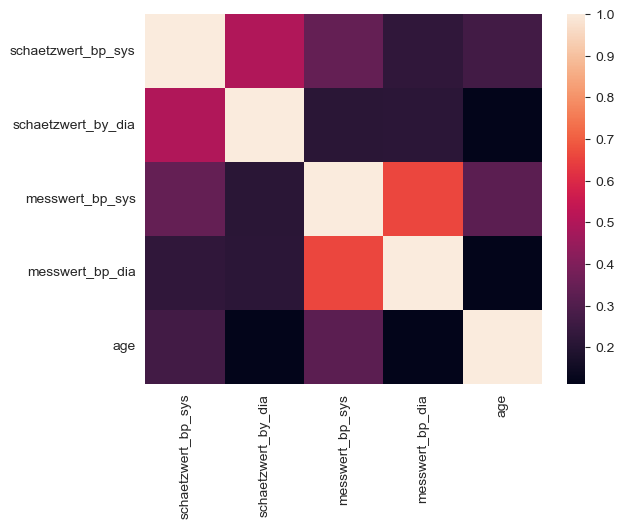

In [5]:
# Evaluate multicoliniarity between the variables:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

From the plot above, we can see that the variables "Estimated Blood Pressure Systolic" and "Estimated Blood Pressure Diastolic" are highly correlated.

/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_10110/3008443837.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['messwert_bp_dia'])


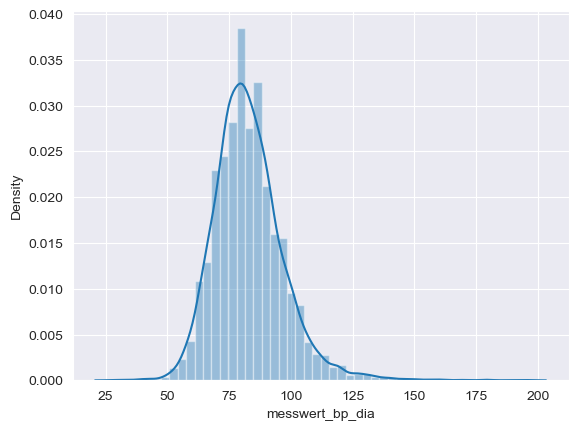

In [6]:
# Check the distribution of the meaesured blood pressure diastolic:
sns.distplot(data_df['messwert_bp_dia'])
plt.show()

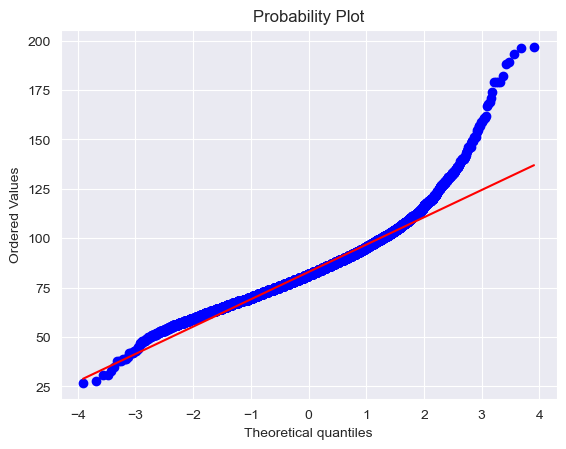

In [7]:
# Check normality of the measured blood pressure diastolic:
from scipy import stats
stats.probplot(data_df['messwert_bp_dia'], plot=plt)
plt.show()

The distribution of the measured blood pressure diastolic is not normal. Therefore, we will use the Spearman correlation coefficient to evaluate the correlation between the variables.

In [8]:
# Evaluate the correlation between the variables:
from scipy.stats import spearmanr
corr, _ = spearmanr(data_df['messwert_bp_sys'], data_df['messwert_bp_dia'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.651


From the result above, we can see that the variables "Measured Blood Pressure Systolic" and "Measured Blood Pressure Diastolic" are highly correlated.

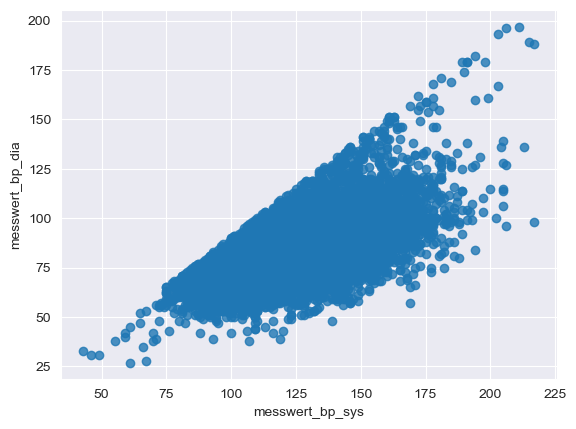

In [9]:
# Evaluate the quadratic nature of the measured blood pressure diastolic:
sns.regplot(x=data_df['messwert_bp_sys'], y=data_df['messwert_bp_dia'], fit_reg=False)
plt.show()

In [10]:
# transform the measured blood pressure diastolic so that it can be normally distributed:
import numpy as np
data_df['messwert_bp_dia'] = np.sqrt(data_df['messwert_bp_dia'])

/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_10110/436652793.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['messwert_bp_dia'])


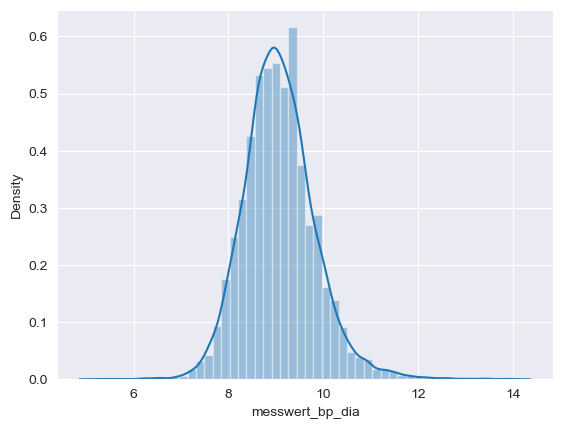

In [11]:
# visualize the distribution of the measured blood pressure diastolic after the transformation:
sns.distplot(data_df['messwert_bp_dia'])
plt.show()

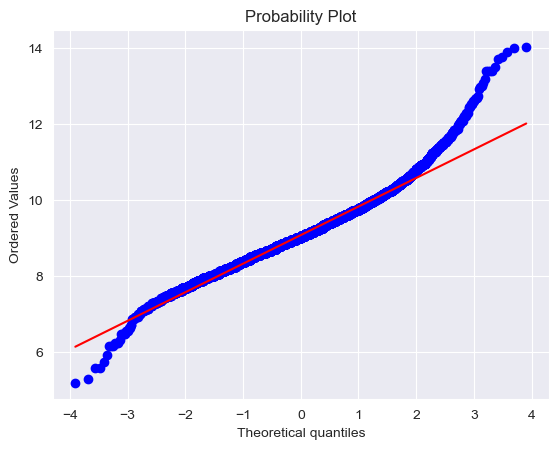

In [12]:
# visualize the normality of the measured blood pressure diastolic after the transformation:
from scipy import stats
stats.probplot(data_df['messwert_bp_dia'], plot=plt)
plt.show()

In [13]:
# regress back to the original measured blood pressure diastolic:
data_df['messwert_bp_dia'] = data_df['messwert_bp_dia']**2
# Apply log transformation on the measured blood pressure diastolic:
data_df['messwert_bp_dia'] = np.log(data_df['messwert_bp_dia'])

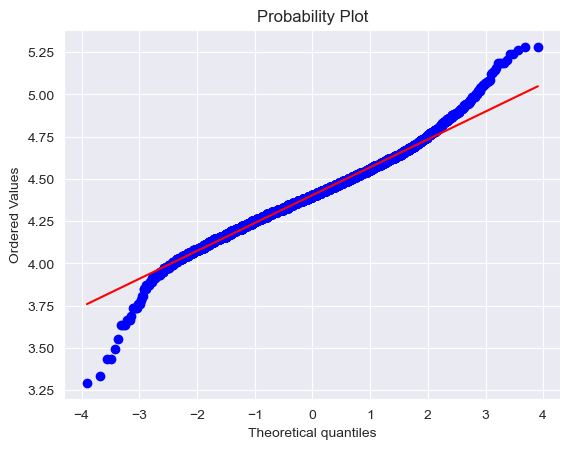

In [14]:
# visualize the qq plot of the measured blood pressure diastolic after the log transformation:
from scipy import stats
stats.probplot(data_df['messwert_bp_dia'], plot=plt)
plt.show()

From the plot above we can see that the log transformation of the measured blood pressure diastolic approaches a normal distribution.

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bundesland           14831 non-null  object 
 1   befinden             14831 non-null  object 
 2   geschlecht           14831 non-null  object 
 3   raucher              14831 non-null  object 
 4   blutzucker_bekannt   14831 non-null  object 
 5   cholesterin_bekannt  14831 non-null  object 
 6   in_behandlung        14831 non-null  object 
 7   schaetzwert_bp_sys   14831 non-null  float64
 8   schaetzwert_by_dia   14831 non-null  float64
 9   messwert_bp_sys      14831 non-null  float64
 10  messwert_bp_dia      14831 non-null  float64
 11  age                  14831 non-null  Int64  
dtypes: Int64(1), float64(4), object(7)
memory usage: 1.4+ MB


In [31]:
# fit a linear regression model to the measured blood pressure diastolic:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from helper_functions import separate_target

# dummy code the categorical variables:
encoded_data = encode_data(data_df, cat_features, num_featurses)
encoded_train_set, encoded_test_set = train_test_split(encoded_data, test_size=0.3)

target = 'messwert_bp_dia'
x_train_dia, y_train_dia = separate_target(encoded_train_set, target)
x_test_dia, y_test_dia = separate_target(encoded_test_set, target)

x_train_sm_dia = sm.add_constant(x_train_dia)
x_test_sm_dia = sm.add_constant(x_test_dia)

model_dia = sm.OLS(y_train_dia, x_train_sm_dia.astype(float)).fit()

print(model_dia.summary())

                            OLS Regression Results                            
Dep. Variable:        messwert_bp_dia   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     398.7
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        21:02:31   Log-Likelihood:                 7082.9
No. Observations:               10381   AIC:                        -1.412e+04
Df Residuals:                   10358   BIC:                        -1.395e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/aymanehachcham/Documents/TU Dortmund/Case Studies 2023/Case-Studies---Project-1/Notebooks/helper_functions.py:90: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_data = pd.get_dummies(df[cat_feat_list], drop_first=True, dtype=int)


<Axes: xlabel='messwert_bp_dia'>

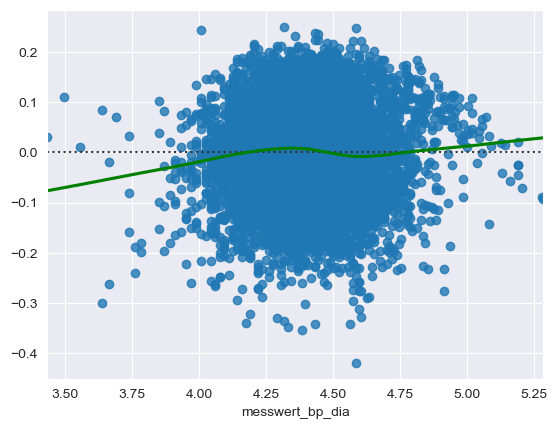

In [17]:
# residual plot for the measured blood pressure diastolic with lowess smoother:
sns.residplot(x=y_train_dia, y=model_dia.resid, lowess=True, line_kws=dict(color="g"))

From the residual plot above, we can see that the residuals are not randomly distributed around zero. This indicates that the linear regression model is not a good fit for the data. The lowess smoother also indicates that the residuals are not randomly distributed around zero.

## Train 2 linear regression models on the measured blood pressure diastolic and measured blood pressure systolic

In [30]:
# fit a linear regression model to the measured blood pressure systolic:
# dummy code the categorical variables:
import statsmodels.api as sm

encoded_data = encode_data(data_df, cat_features, num_featurses)
encoded_train_set_sys, encoded_test_set_sys = train_test_split(encoded_data, test_size=0.3)

target = 'messwert_bp_sys'
x_train_sys, y_train_sys = separate_target(encoded_train_set_sys, target)
x_test_sys, y_test_sys = separate_target(encoded_test_set_sys, target)

x_train_sm = sm.add_constant(x_train_sys)
x_test_sm = sm.add_constant(x_test_sys)
model_sys = sm.OLS(y_train_sys, x_train_sm.astype(float)).fit()

print(model_sys.summary())

                            OLS Regression Results                            
Dep. Variable:        messwert_bp_sys   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     515.5
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        21:01:11   Log-Likelihood:                -41561.
No. Observations:               10381   AIC:                         8.317e+04
Df Residuals:                   10358   BIC:                         8.333e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/aymanehachcham/Documents/TU Dortmund/Case Studies 2023/Case-Studies---Project-1/Notebooks/helper_functions.py:90: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_data = pd.get_dummies(df[cat_feat_list], drop_first=True, dtype=int)


<Axes: xlabel='messwert_bp_sys'>

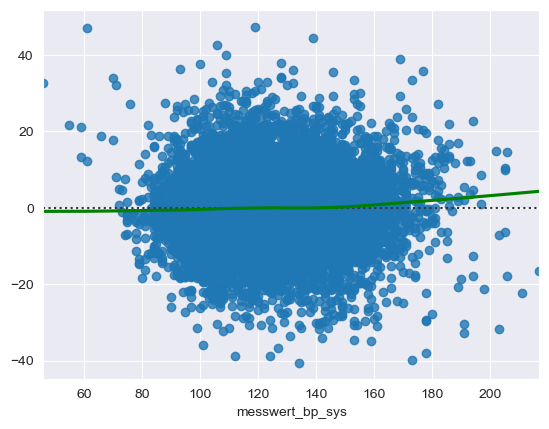

In [19]:
# residual plot for the measured blood pressure diastolic with lowess smoother:
sns.residplot(x=y_train_sys, y=model_sys.resid, lowess=True, line_kws=dict(color="g"))

In [20]:
# Based on the model above extract the confidence intervals for the coefficients:
print(model_sys.conf_int())

                                      0           1
const                       -213.827640 -198.546151
bundesland_Kärnten            -0.864751    6.617757
bundesland_Niederösterreich   -2.429599    4.316100
bundesland_Oberösterreich     -3.585131    3.814090
bundesland_Salzburg           -5.254025    4.230166
bundesland_Steiermark         -1.955268    4.102062
bundesland_Tirol              -9.166616    0.899072
bundesland_Vorarlberg        -12.598526    1.436573
bundesland_Wien               -4.255219    2.436366
bundesland_not applicable     -3.474963    3.688813
befinden_2.0                   0.298190    1.453352
befinden_3.0                  -0.303290    1.341253
befinden_4.0                  -2.010383    2.677913
befinden_5.0                  -4.500964    3.433951
geschlecht_m                   0.939531    1.999299
raucher_True                  -1.113649    0.297604
blutzucker_bekannt_True        0.151084    1.608410
cholesterin_bekannt_True      -1.121986    0.229647
in_behandlun

In [21]:
# Based on the model above extract the p-values for the coefficients that are statistically significant:
model_sys.pvalues

const                           0.000000e+00
bundesland_Kärnten              1.318116e-01
bundesland_Niederösterreich     5.835751e-01
bundesland_Oberösterreich       9.516347e-01
bundesland_Salzburg             8.324144e-01
bundesland_Steiermark           4.872481e-01
bundesland_Tirol                1.074235e-01
bundesland_Vorarlberg           1.190461e-01
bundesland_Wien                 5.941808e-01
bundesland_not applicable       9.533396e-01
befinden_2.0                    2.963654e-03
befinden_3.0                    2.160456e-01
befinden_4.0                    7.801764e-01
befinden_5.0                    7.921023e-01
geschlecht_m                    5.579211e-08
raucher_True                    2.570457e-01
blutzucker_bekannt_True         1.796930e-02
cholesterin_bekannt_True        1.956573e-01
in_behandlung_True              6.112759e-23
schaetzwert_bp_sys              5.403156e-63
schaetzwert_by_dia              3.879849e-04
messwert_bp_dia                 0.000000e+00
age       

### Test the models on the testing set

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

preds = model_dia.predict(x_test_sm_dia)
print('Mean squared error for Diastolic model: %.2f' % mean_squared_error(y_test_dia, preds))
print('Coefficient of determination Diastolic model: %.2f' % r2_score(y_test_dia, preds))

preds_2 = model_sys.predict(x_test_sm)
print('Mean squared error Systolic model: %.2f' % mean_squared_error(y_test_sys, preds_2))
print('Coefficient of determination Systolic model: %.2f' % r2_score(y_test_sys, preds_2))

Mean squared error for Diastolic model: 0.01
Coefficient of determination Diastolic model: 0.46
Mean squared error Systolic model: 176.10
Coefficient of determination Systolic model: 0.53


## Use Best Subset Selection to select the best set of features

In [39]:
from helper_functions import best_subset_selection

criterion = 'mse'
verbose = 1

if criterion == "mse":
    best_val = np.inf
elif criterion in ["adjusted_r_2", "r_2"]:
    best_val = -np.inf

best_train_results = None
best_model = None
best_test_results = None
best_features = None
n_features = len(x_train_sm_dia.columns)
features = x_train_sm_dia.columns


for i in range(1, n_features):
    if verbose > 1:
        print("\nNum features: ", i, "=======================================================")
    for j in range(n_features):
        current_features = features[j:j+i]
        if len(current_features) < i:
            break

        X_train_curr = x_train_sm_dia[current_features]
        X_test_curr = x_test_sm_dia[current_features]

        train_results, test_results, model = fit_model(X_train_curr, Y_train, X_test_curr, Y_test, model_type, params)
        if verbose > 1:
            print("\nFeatures: ", current_features)
            print("Train Results: ", train_results)
            print("Test Results: ", test_results)
        condition = False

        if criterion == "mse":
            condition = test_results[criterion] < best_val
        elif criterion in ["adjusted_r_2", "r_2"]:
            condition = test_results[criterion] > best_val
        if condition:
            best_val = test_results[criterion]
            best_model = model
            best_features = current_features
            best_train_results = train_results
            best_test_results = test_results

    if verbose > 0:
        print("\nBest Model: ")
        print("Features: ", best_features)
        print("Train Results: ", best_train_results)
        print("Test Results: ", best_test_results)

    return best_model, best_train_results, best_test_results

TypeError: 'NoneType' object is not subscriptable